2021.10.11

### 예제 (qqplot):

`-` 히스토그램이나 박스플랏보다 분포를 특정하기에 좋은 시각화는 없을까?

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats

In [3]:
np.random.seed(18535)
x=np.random.normal(size=1000,loc=2,scale=1.5) #정규분포
y=stats.t.rvs(df=10,size=1000)/np.sqrt(10/8)*1.5 + 2 #t분포

(array([ 18.,  30.,  92., 175., 204., 228., 140.,  82.,  20.,  11.]),
 array([-2.2627067 , -1.39384505, -0.5249834 ,  0.34387825,  1.2127399 ,
         2.08160155,  2.9504632 ,  3.81932485,  4.6881865 ,  5.55704815,
         6.4259098 ]),
 <BarContainer object of 10 artists>)

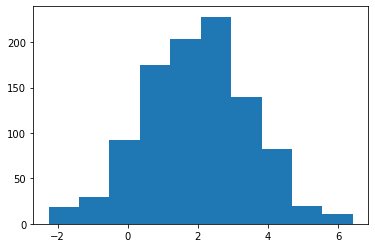

In [4]:
plt.hist(x)

(array([  4.,  13.,  72., 224., 372., 226.,  75.,  11.,   1.,   2.]),
 array([-4.02633685, -2.69040349, -1.35447013, -0.01853677,  1.31739659,
         2.65332994,  3.9892633 ,  5.32519666,  6.66113002,  7.99706338,
         9.33299673]),
 <BarContainer object of 10 artists>)

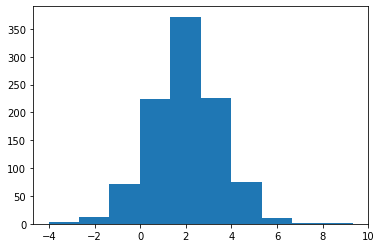

In [5]:
plt.hist(y)

`-` 우리가 관측한 $x_1,\dots,x_{1000}$이 $N(2,1.5^2)$에서 나온 샘플인지 궁금하다.

`-` 아이디어

(1) 관측한 값을 순서대로 나열하여 $x_{(1)},x_{(2)}, \dots, x_{(1000)}$을 만든다. (순서통계랑, 값을 순서대로 배열한 것)

In [6]:
x[:2]

array([3.09075906, 1.44285021])

- $x_1=3.09075906, x_2=1.44285021$

In [7]:
x.sort()

In [8]:
x[:2]

array([-2.2627067, -2.2236866])

- $x_1=-2.262706, x_2=-2.2236866$

(2)파이썬이나 R로 $N(2,1.5^2)$에서 1000개의 정규분포를 생성, 그리고 순서대로 나열하여 $\tilde{x}_{(1)},\tilde{x}_{(2)}, \dots, \tilde{x}_{(1000)}$를 만든다.

(3) $x_{{1}}\approx \tilde{x}_{{1}} \dots x_{{1000}}\approx \tilde{x}_{{1000}}$이면 x는 정규분포일것.

`-` 그런데 $\tilde{x}_{{1}},\tilde{x}_{{2}}, \dots, \tilde{x}_{{1000}}$은 시뮬레이션을 할 때마다 다른값이 나올테니까 불안정한 느낌이 든다. $\to$ 이론적인 값을 계산하자.

In [9]:
xx=(x-np.mean(x)) / np.std(x,ddof=1)
xx[:3]

array([-2.77869047, -2.75301272, -2.74491219])

In [10]:
print(stats.norm.ppf(0.001))
print(stats.norm.ppf(0.002))

-3.090232306167813
-2.878161739095483


`-` 이론적인 값

`-` 분위수

In [11]:
m=[i/1000 for i in np.arange(1000)+1]

In [12]:
q=[]
for i in range(len(m)):
    q=q+[stats.norm.ppf(m[i])]

In [165]:
q[:2]

[-3.090232306167813, -2.878161739095483]

`-` $xx \approx q$을 확인하기 위해서 $(q,q)$그래프와 $(q,xx)$의 그래프를 그려서 겹쳐보자.

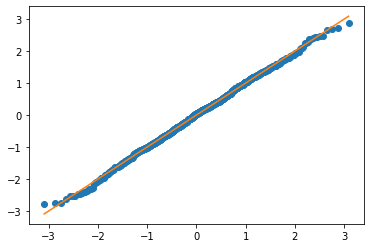

In [166]:
plt.plot(q,xx,'o')
plt.plot(q,q,'-')

- 해석: 점들이 주황색선 근처에 모여있을수록 정규분포에 가깝다.

`-` 아래와 같이 쉽게 그릴 수도 있다. (우리가 그린 그림과 조금 다르게 보인다)

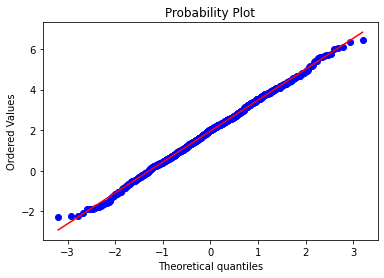

In [167]:
_ = stats.probplot(x,plot=plt) #_로 숫자 값이 반환된 걸 받아 생략

- 자세히보면 조금 다르게 그려지긴 하는데 이는 `stats.plobplot()`이 $m=(\frac{1}{1000},\frac{2}{1000},\dots,\frac{1000}{1000})$와 같이 계산하지 않고 약간 보정된 값을 이용하기 때문

- stats.probplot? 을 통하여 확인한 결과 아래와 같은 코드로 구현됨
```python
### 보정하는방법1 
n=len(xx)
m=[((i+1)-0.3175)/(n+0.365) for i in range(n)]
m[-n]=0.5**(1/n)
m[0]=1-m[-n]
```


- 프로그램에 따라서 아래와 같이 보정하는 경우도 있음
```python
### 보정하는방법2
m=[(i-3/8)/(n+1/4) for i in np.arange(1000)+1]
```


- 또 `stats.plobplot`은 y축에 표준화 전의 x값이 있음을 알 수 있다. 그래서 y값 범위가 다르다.

`-` 정규분포와 t분포의 qqplot을 그려서 비교해보자.

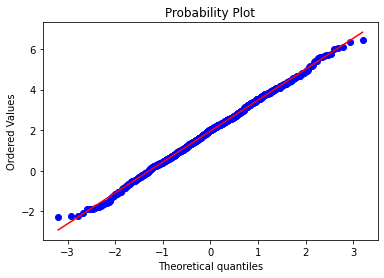

In [168]:
_ = stats.probplot(x,plot=plt) # 정규분포

- 정규분포

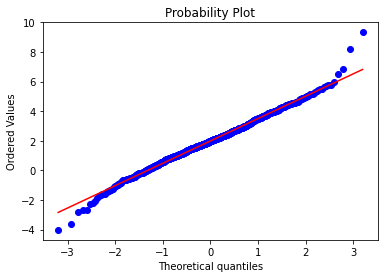

In [169]:
_ = stats.probplot(y,plot=plt) # t분포

- t분포 : 파랑점들이 대체로 붉은선 위세 놓여있는 듯 하지만 양 끝단에서 그렇지 않다.

>=> 중앙부근은 정규분포와 비슷하지만 꼬리부분은 정규분포와 확실히 다르다

- 왼쪽꼬리 : 이론적으로 나와야 할 값보다 더 작은 값이 실제로 관측됨
- 오른쪽꼬리 : 이론적으로 나와야 할 값보다 더 큰 값이 실제로 관측됨
- 해석 : 이 분포는 정규분포보다 두꺼운 꼬리를 가진다.

`-` 서브플랏팅 : 두 분포를 양 옆에 나란히 놓고 비교하고 싶다.

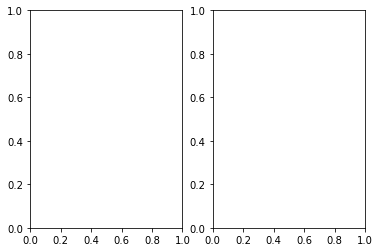

In [170]:
fig , (ax1,ax2) = plt.subplots(1,2)

In [171]:
_ = stats.probplot(x,plot=ax1)
_ = stats.probplot(y,plot=ax2)

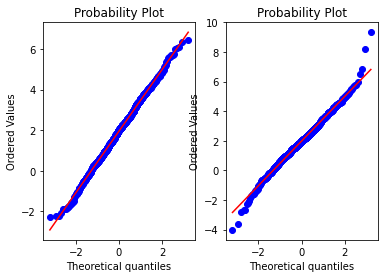

In [172]:
fig

In [173]:
fig.set_figwidth(8)

In [174]:
ax1.set_title('normal dist')
ax2.set_title('t dist')

Text(0.5, 1.0, 't dist')

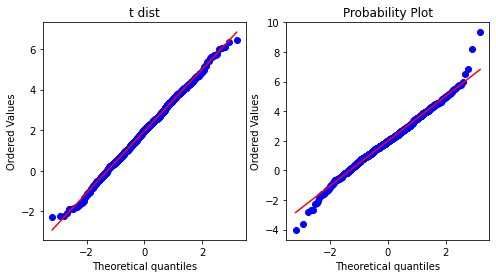

In [175]:
fig

### 예제4 (boxplot, histogram, qqplot)

`-` 박스플랏, 히스토그램, qqplot을 그려보자.

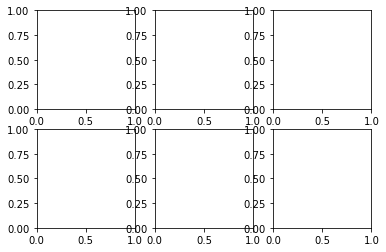

In [176]:
fig, ax =plt.subplots(2,3)

In [177]:
ax

array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

In [178]:
(ax1,ax2,ax3), (ax4,ax5,ax6) = ax #ax먼저 함수 실행해서 리스트 형태 파악하기!!!

In [179]:
sns.boxplot(x,ax=ax1)
sns.histplot(x,kde=True,ax=ax2)
_ = stats.probplot(x,plot=ax3)
sns.boxplot(y,ax=ax4)
sns.histplot(y,kde=True,ax=ax5)
_ = stats.probplot(y,plot=ax6)

/Users/dlqhd/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/dlqhd/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


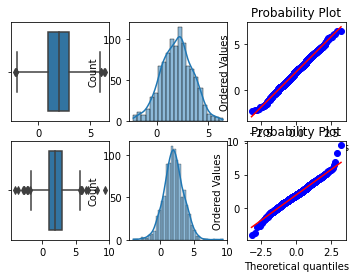

In [180]:
fig

In [183]:
fig.set_figwidth(10)
fig.set_figheight(8)
fig.tight_layout()

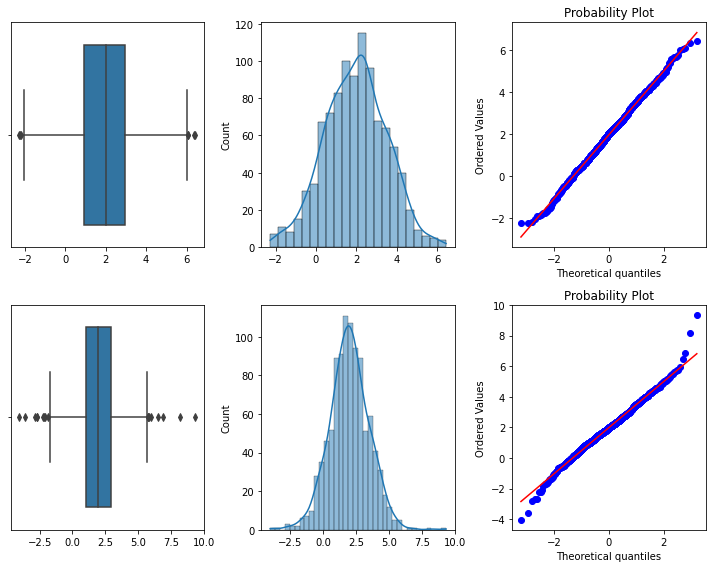

In [184]:
fig

#### Appendix : 분위수를 구하는 다양한 방법

In [198]:
m =[i/1000 for i in np.arange(1000)+1]

- $m=\big\{\frac{i}{1000}:  i \in \{1,2,3,\dots,1000\} \big\}=\big\{\frac{1}{1000},\frac{2}{1000},\dots,\frac{1000}{1000} \big\}$

`-` 방법1

In [199]:
q=[]
for i in range(len(m)):
    q=q+[stats.norm.ppf(m[i])]
q[:5]

[-3.090232306167813,
 -2.878161739095483,
 -2.7477813854449926,
 -2.6520698079021954,
 -2.575829303548901]

`-` 방법2

In [200]:
q=[stats.norm.ppf(m[i]) for i in range(len(m))]

In [201]:
q[:5]

[-3.090232306167813,
 -2.878161739095483,
 -2.7477813854449926,
 -2.6520698079021954,
 -2.575829303548901]

`-` 방법3

In [208]:
q=list(map(stats.norm.ppf, m))
q[:5]

[-3.090232306167813,
 -2.878161739095483,
 -2.7477813854449926,
 -2.6520698079021954,
 -2.575829303548901]

`-` 방법4

In [209]:
stats.norm.ppf(m)[:5]

array([-3.09023231, -2.87816174, -2.74778139, -2.65206981, -2.5758293 ])

### Appendix: lambda,map

#### lambda

`-` 예제1 : 사용방법

In [216]:
f = lambda x,y,z : x+y+z ## lambda 입력:출력

In [217]:
f(2,3,4)

9

`-` 예제2 : 디폴트입력값

In [218]:
x=(lambda a='fee',b='fie',c='foe': a+b+c)

In [223]:
x('wee')

'weefiefoe'

`-` 예제3 : 람다들의 리스트가능

In [225]:
l=[lambda x : x**2, lambda x: x**3, lambda x: x**4]

In [228]:
l[2](3)

81

In [229]:
for f in l:
    print(f(2))

4
8
16


In [230]:
def _f(a):
    return a+1

`-` 예제4 : 람다들의 딕셔너리 가능

In [235]:
dct={'f1': (lambda x: x+1),'f2': (lambda x: x+22),'f3': (lambda x: x+333)}

In [239]:
dct['f1'](1), dct['f2'](2), dct['f3'](3)

(2, 24, 336)

`-` 예제5 : 조건부 출력

(예비학습) 문자열의 대소비교

In [240]:
'a' < 'b'

True

In [241]:
'c' < 'b'

False

(예제시작)

In [242]:
lower = lambda x,y : x if x<y else y

In [245]:
lower('a','b')

'a'

In [246]:
lower('c','b')

'b'

`-` 예제6 : lambda expression을 return하는 함수

In [247]:
def action (x):
    return (lambda y: x+y)

In [250]:
act1 = action(99) ## act1는 99+y를 수행하는 함수
act2 = action(98) ## act2는 98+y를 수행하는 함수

- action은 마치 함수를 만드는 함수같다.

In [252]:
print(act1(2))
print(act2(2))

101
100


`-` 예제 7 : 예제6의 발전

In [253]:
action = lambda x: (lambda y: x+y)

In [254]:
act1 = action(99)
act2 = action(98)

In [256]:
print(act1(2))
print(act2(2))

101
100


괄호를 생략하여 선언하면

In [258]:
action = lambda x: lambda y: x+y
act1 = action(99)
act2 = action(98)
print(act1(2))
print(act2(2))

101
100


#### map

`-` 예제1 : 사용방법

In [259]:
def inc(x) : return x+1

In [261]:
list(map(inc,[1,2,3,4]))

[2, 3, 4, 5]

`-` 예제1의 변형(람다사용)

In [300]:
#list(map(inc(x) : return x+1,[1,2,3,4])) #되지 않음

In [263]:
list(map(lambda x : x+1,[1,2,3,4]))

[2, 3, 4, 5]

`-` 함수명을 쓰는 자리에 lambda로 표현한 오브젝트 자체를 전달할 수 있다. $\to$ 코드가 간단하다.

`-` 예제2 : map과 리스트 컴프리헨션 비교

(함수선언)

In [267]:
f = lambda x: 'X' in x

In [269]:
f('X1'),f('X2'),f('Y1'),f('Y1')

(True, True, False, False)

(map)

In [273]:
map(f,['X1','X2','Y3','Y4'])

In [274]:
list(map(f,['X1','X2','Y3','Y4']))

[True, True, False, False]

(리스트 컴프리헨션과 비교)

In [276]:
[f(x) for x in ['X1','X2','Y3','Y4']]

[True, True, False, False]

`-` 예제3

(함수소개)

In [280]:
pow(2,4) #2**4

16

(map)

In [283]:
map(pow,[2,2,2,3,3,3],[0,1,2,0,1,2])

In [285]:
list(map(pow,[2,2,2,3,3,3],[0,1,2,0,1,2])) #2^0,2^1,2^2,3^0,3^1,3^2

[1, 2, 4, 1, 3, 9]

(리스트 컴프리헨션과 비교)

In [288]:
zip([2,2,2,3,3,3],[0,1,2,0,1,2])

In [289]:
list(zip([2,2,2,3,3,3],[0,1,2,0,1,2]))

[(2, 0), (2, 1), (2, 2), (3, 0), (3, 1), (3, 2)]

In [287]:
[pow(x,y) for x,y in zip([2,2,2,3,3,3],[0,1,2,0,1,2])] #=[pow(x,y) for x,y in [(2, 0), (2, 1), (2, 2), (3, 0), (3, 1), (3, 2)]]

[1, 2, 4, 1, 3, 9]

`-` 예제4 : map은 (하나의 함수,다양한 입력)인 경우에 사용 가능

In [296]:
l=[lambda x: x+1, lambda x: x+2, lambda x: x+3]

In [299]:
#list(map(l,[100,200,300])) # 여러개의 함수, 실행 안됌

리스트 컴프리헨션은 (다양한 함수, 다양한 입력)이 가능함

In [301]:
[l[i](x) for i,x in zip([0,1,2],[100,200,300])]

[101, 202, 303]

`-` **종합 : 리스트 컴프리헨션과 비교하면 (1) 반복인덱스를 쓰지 않는 장점이 있는 반면 (2)좀 더 제약적으로 사용할 수 밖에 없다는 단점이 있다**

### 애드워드 터프티

`-` 시각화계의 거장

`-` 터프티의 이론 중 백미: 엄격한 미니멀리즘
- 최소한의 잉크로 많은 정보를 전달할 수 있다면 그것이 바로 좋은 그래프이다.
- 작은 지면 내에서 잉크를 최대한 적게 써서 짧은 시간 안에 많은 영감을 주어야 한다.

`-` 데이터-잉크비: 데이터를 표현하는 데 들어가는 잉크의 양 / 그래픽을 인쇄하는데 들어가는 잉크의 총량

`-` 차트정크 (나이젤홈즈의 그래프)

![](https://github.com/guebin/2021DV/blob/master/_notebooks/2021-10-06-fig1.jpeg?raw=true "그림1: <타임>에 수록된 나이젤홈즈의 작품")

>  “Lurking behind chartjunk is contempt both for information and for the audience. Chartjunk promoters imagine that numbers and details are boring, dull, and tedious, requiring ornament to enliven. Cosmetic decoration, which frequently distorts the data, will never salvage an underlying lack of content. If the numbers are boring, then you’ve got the wrong numbers (...) Worse is contempt for our audience, designing as if readers were obtuse and uncaring. In fact, consumers of graphics are often more intelligent about the information at hand than those who fabricate the data decoration (...) The operating moral premise of information design should be that our readers are alert and caring; they may be busy, eager to get on with it, but they are not stupid.”

- 차트정크 = 대중을 멸시 + 데이터에 대한 모독
- 차트정크 옹호가 = 숫자와 데이터를 지루해하여 활기가 필요하다고 생각하는 모양이다..

`-` 별로인 그래프 (왼쪽) / 우수한 그래프 오른쪽

![](https://github.com/guebin/2021DV/blob/master/_notebooks/2021-10-05-fig2.jpeg?raw=true)

`-` 별로인 그래프 (왼쪽) / 우수한 그래프 오른쪽

![](https://github.com/guebin/2021DV/blob/master/_notebooks/2021-10-05-fig3.jpeg?raw=true)

`-` 글쎄...

### 찰스미나드의 도표 (인류역사상 가장 훌륭한 시각화)

![](https://upload.wikimedia.org/wikipedia/commons/2/29/Minard.png)

`-` 터프티의 평
- 지금까지 그려진 최고의 통계 그래픽일지도 모른다.
- 여기에서는 군대의 크기, 2차원 평면상의 위치, 군대의 이동방향, 모스코바에서 퇴각하는 동안의 여러 날짜, 온도 -> 6차원의 변수
- 백만번에 한번 이런 그림을 그릴 수는 있겠지만 이러한 멋진 그래픽을 만드는 방법에 대한 원칙은 없다. $\to$ 미니멀리즘..

`-` 왜 우수한 그래프일까?
- 자료를 파악하는 기법은 최근까지도 산점도, 막대그래프, 라인플랏에 의존
- 이러한 플랏의 단점은 고차원의 자료를 분석하기 어렵다는 것임
- 미나드는 여러그림을 그리는 방법 대신에 한 그림에서 패널을 늘리는 방법을 선택함.

### 예제

In [315]:
x=[44,48,49,58,62,68,69,70,76,79] ## 몸무게 
y=[159,160,162,165,167,162,165,175,165,172] ## 키
g= 'f','f','f','f','m','f','m','m','m','m'
df=pd.DataFrame({'w':x,'h':y,'g':g})

In [316]:
df

,w,h,g
0,44,159,f
1,48,160,f
2,49,162,f
3,58,165,f
4,62,167,m
5,68,162,f
6,69,165,m
7,70,175,m
8,76,165,m
9,79,172,m


`-` 미나드의 접근방법

<AxesSubplot:xlabel='w', ylabel='h'>

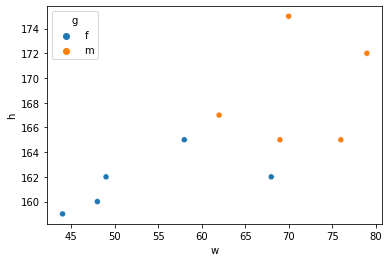

In [318]:
sns.scatterplot(data=df,x='w',y='h',hue='g')

`-` 일반적인 사람들은 보통 색깔을 사용할 생각을 못한다.

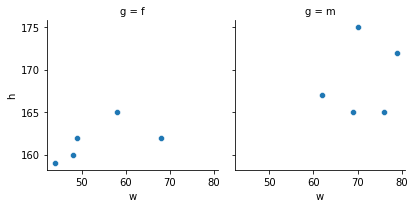

In [322]:
figs = sns.FacetGrid(df,col='g')
figs.map(sns.scatterplot,'w','h')

`-` 생각보다 데이터가 정리된 형태에 따라서 시각화에 대한 사고방식이 달라진다. 아래와 같은 자료를 받았다고 하자.

In [325]:
df1=df.query("g=='f'")[['w','h']] # 여성.csv
df2=df.query("g=='m'")[['w','h']] # 남성.csv

In [326]:
df1

,w,h
0,44,159
1,48,160
2,49,162
3,58,165
5,68,162


In [327]:
df2

,w,h
4,62,167
6,69,165
7,70,175
8,76,165
9,79,172


`-` 데이터프레임을 바꿀 생각을 하는게 쉽지 않다.

In [333]:
df1['g']='f'

In [334]:
df2['g']='m'

In [335]:
pd.concat([df1,df2])

,w,h,g
0,44,159,f
1,48,160,f
2,49,162,f
3,58,165,f
5,68,162,f
4,62,167,m
6,69,165,m
7,70,175,m
8,76,165,m
9,79,172,m


(방법2)

In [336]:
df1=df.query("g=='f'")[['w','h']]
df2=df.query("g=='m'")[['w','h']]

In [13]:
pd.concat([df1,df2],keys=['f','m']).reset_index().iloc[:,[0,2,3]].rename(columns={'level_0':'g'})

NameError: name 'df1' is not defined

`-` 어려운점 : (1) 센스가 없어 색깔을 넣어서 그룹을 구분 할 생각을 못함 (2) 변형해야 할 데이터를 생각 못함 (3) 데이터를 변형할 생각을 한다고 해도 변형하는 실제적인 코드를 구현할 수 없음 (그래서 엑셀을 킨다..)

- (1) 기획력부족 -> 훌륭한 시각화를 많이 볼것
- (2) 데이터프레임에 대한 이해도가 부족 -> tidydata에 대한 개념 정립
- (3) 프로그래밍 능력 부족 -> 코딩공부 열심히..

`-` 목표 : (2) 어떠한 데이터 형태로 변환해야 하는가? (3) 그러한 데이터 형태로 바꾸기 위한 Pandas 숙련도

### 숙제

In [351]:
x=np.random.chisquare(df=5,size=100)
x

array([ 1.95459231,  3.92344356,  3.03813989,  2.83258488,  3.09502597,
        3.50856988,  2.3976357 ,  9.46188754,  1.74640946,  5.13130507,
        3.31502233,  4.12628543,  7.17369286,  3.07702458,  1.93473073,
        2.14533897,  4.8673216 ,  4.40901244,  4.63175473, 13.61456291,
        3.08546259,  3.99416304,  1.06787986,  2.45904523,  8.56040261,
        8.06826444,  3.27285393,  2.63848175,  5.32895599,  7.8822417 ,
        1.82861119,  2.82437258,  2.69940831,  3.63929114,  4.79733945,
       11.28258667,  1.20321952,  6.69295089,  4.22381046,  2.34247933,
        8.43625409, 12.00118158,  8.10481554,  6.58343209, 13.085472  ,
        4.9888837 ,  5.6837837 ,  4.85105338,  8.92487736,  2.59991918,
        4.97484599, 11.38412336,  4.22832253,  2.6411654 ,  1.80128889,
        4.05973698,  8.78179986,  6.43711433,  8.04783836, 18.76383401,
        7.03991506,  6.06133254,  4.48896993,  3.06196511,  5.94860794,
       13.55105169,  1.06344047,  4.38932046,  4.80651001,  1.53

<AxesSubplot:ylabel='Count'>

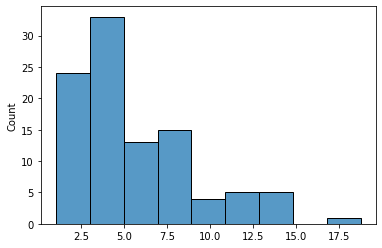

In [352]:
sns.histplot(x)

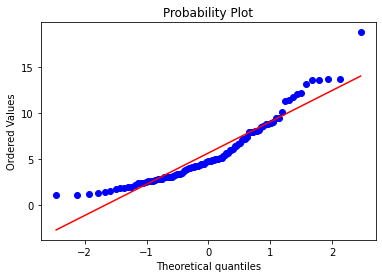

In [353]:
_ = stats.probplot(x,plot=plt)

`-` 자유도가 5인 카이제곱분포에서 100개의 랜덤변수를 만들고, boxplot / histogram / qqplot 나란히 보이게 만들어서 제출하기

### 2021.10.13

## 해들리위컴 그래프레이어

#### import

In [2]:
import pandas as pd
from plotnine import *

### data 

`-` ref: https://r4ds.had.co.nz/index.html

In [14]:
#import rpy2 맥에서 안됌, 필요하다면 rstudio를 활용해 따라해보자.

#### 저장된 파일을 통하여 데이터를 확보

In [6]:
pd.read_csv('mpg.csv')

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


#### github등에 공개된 csv를 읽어오기

In [9]:
mpg = pd.read_csv('https://raw.githubusercontent.com/guebin/2021DV/master/_notebooks/mpg.csv') #raw 데이터

`-` 깃허브 저장소에 아예 데이터만 따로 모아서 관리하는 것도 좋은 방법입니다.

### data 설명

`-` 'displ' : 자동차의 엔진 크기
    
`-` 'hwy' : 연료 효율(동일한 연료로 얼마나 멀리 가는지)

`-`자세한 설명을 R에서 `?mpg`로 알아볼것

#### 기본산점도(2차원)

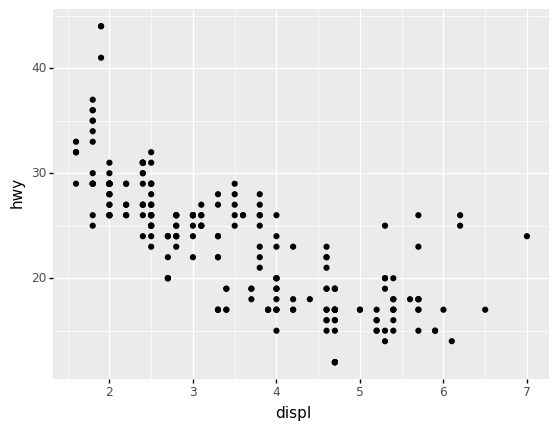

<ggplot: (8786868702775)>

In [13]:
ggplot(data = mpg) + geom_point(mapping = aes(x = 'displ', y = 'hwy')) ##plotnine

- 산점도 : 엔진크기와 연료효율은 반비례. (엔진이 큰 차일수록 연비가 좋지 않다)

`-` 객체지향적인 느낌으로 산점도 그리기

***step1: 도화지를 준비한다***

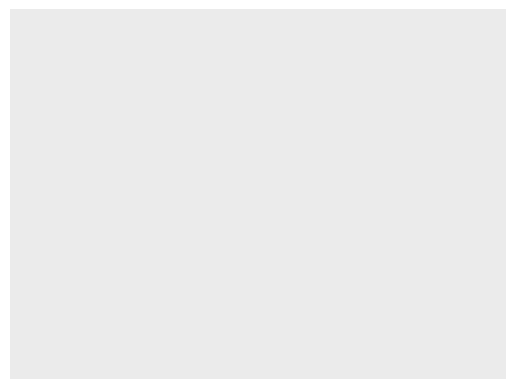

<ggplot: (8786900138900)>

In [18]:
fig = ggplot(data=mpg)
fig

***step2 : 변수와 에스테틱 사이의 맵핑을 설정한다.***

In [20]:
a1=aes(x='displ',y='hwy')
a1

{'x': 'displ', 'y': 'hwy'}

***step3: 점들의 집합을 만든다. 즉 포인트지움을 만든다.***

In [24]:
point1=geom_point(mapping = a1)

- geom_point(): 점들을 그려! 어떻게 ?
- 'a1'에서 설정된 표를 보고

***step4 : 도화지와 지움을 합친다.***

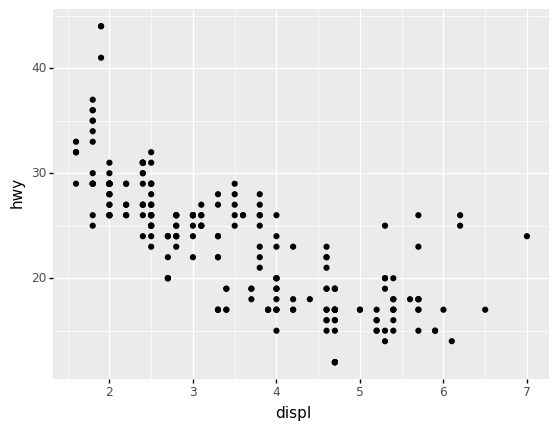

<ggplot: (8786900138981)>

In [22]:
fig+point1

`-` 빠르게 그리기 : `mapping = `와 `data=`는 생략가능함

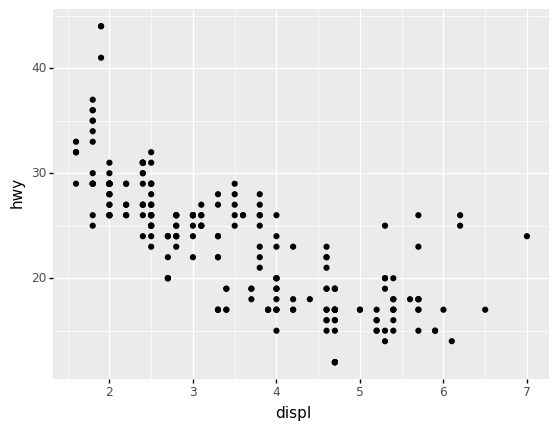

<ggplot: (8786868638919)>

In [26]:
ggplot(mpg) + geom_point(aes(x = 'displ', y = 'hwy'))

### 산점도응용 (3차원)

`-` 데이터를 다시 관찰

In [30]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


`-` class도 함께 plot에 표시하면 데이터를 탐색할 때 좀 더 좋을것 같다.

#### 산점도 + 점크기변경

/Users/dlqhd/opt/anaconda3/lib/python3.8/site-packages/plotnine/scales/scale_size.py:48: PlotnineWarning: Using size for a discrete variable is not advised.


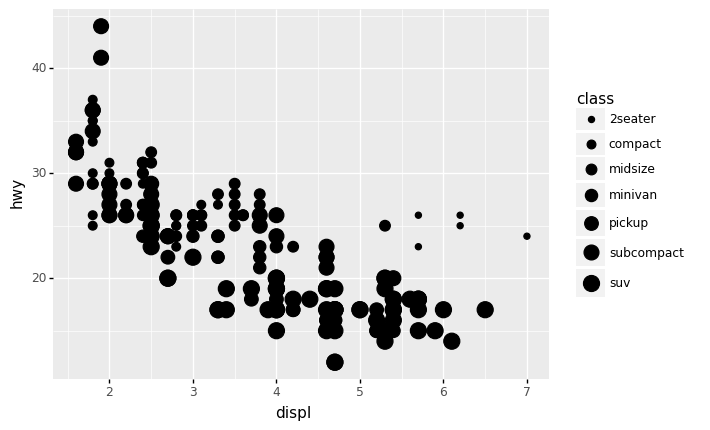

<ggplot: (8786883585106)>

In [34]:
ggplot(data=mpg) + geom_point(mapping=aes(x='displ',y='hwy',size='class'))

#### 산점도 + 투명도변경

/Users/dlqhd/opt/anaconda3/lib/python3.8/site-packages/plotnine/scales/scale_alpha.py:68: PlotnineWarning: Using alpha for a discrete variable is not advised.


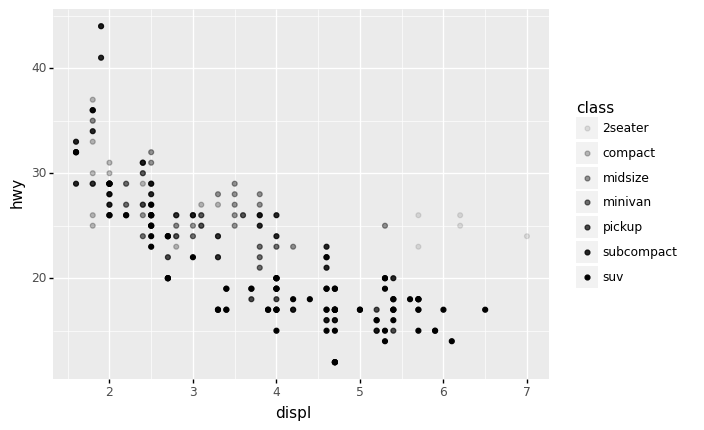

<ggplot: (8786883600249)>

In [35]:
ggplot(data=mpg) + geom_point(mapping=aes(x='displ',y='hwy',alpha='class'))

/Users/dlqhd/opt/anaconda3/lib/python3.8/site-packages/plotnine/scales/scale_alpha.py:68: PlotnineWarning: Using alpha for a discrete variable is not advised.
/Users/dlqhd/opt/anaconda3/lib/python3.8/site-packages/plotnine/scales/scale_size.py:48: PlotnineWarning: Using size for a discrete variable is not advised.


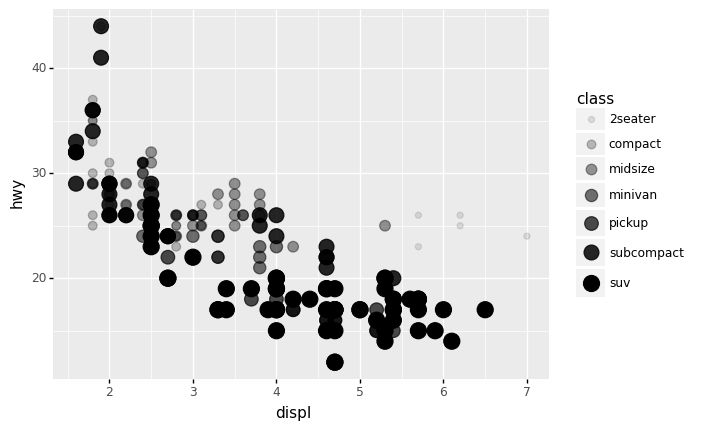

<ggplot: (8786883648723)>

In [36]:
ggplot(data=mpg) + geom_point(mapping=aes(x='displ',y='hwy',alpha='class',size='class'))

#### 산점도 + 형태

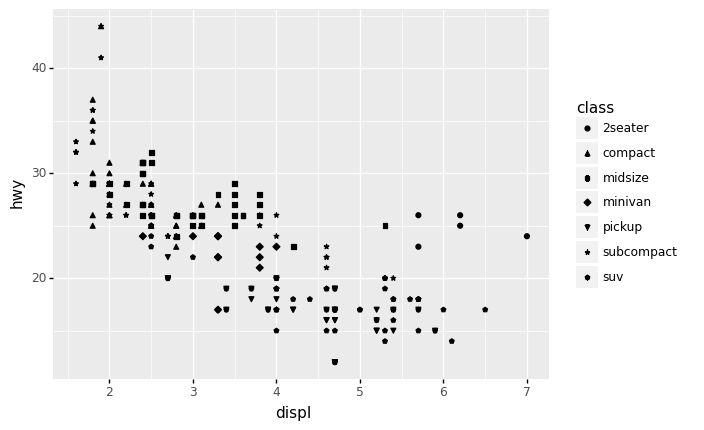

<ggplot: (8786868638799)>

In [37]:
ggplot(data=mpg) + geom_point(mapping=aes(x='displ',y='hwy',shape='class'))

#### 산점도 + 색깔

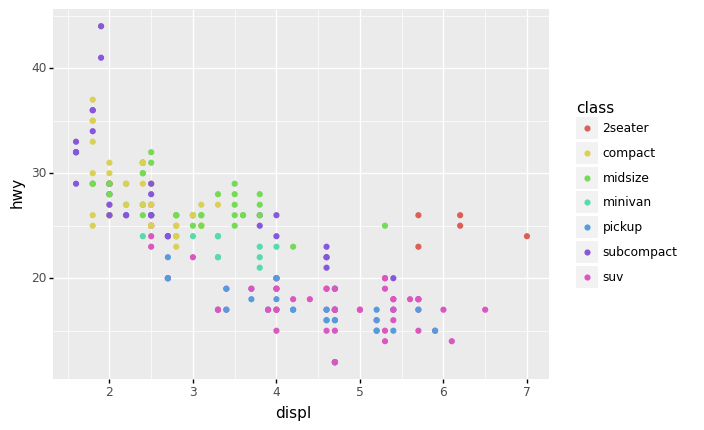

<ggplot: (8786900313640)>

In [39]:
ggplot(data=mpg) + geom_point(mapping=aes(x='displ',y='hwy',color='class'))

`-` 객체지향적으로 ?

In [116]:
a2 = aes(x='displ',y='hwy',color='class')

In [41]:
a1,a2

({'x': 'displ', 'y': 'hwy'}, {'x': 'displ', 'y': 'hwy', 'color': 'class'})

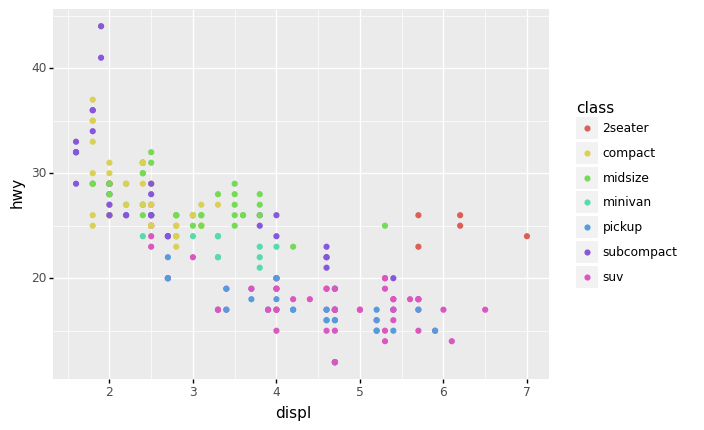

<ggplot: (8786900371896)>

In [46]:
point2=geom_point(a2)
fig+point2

#### 지움을 더 추가(적합선)

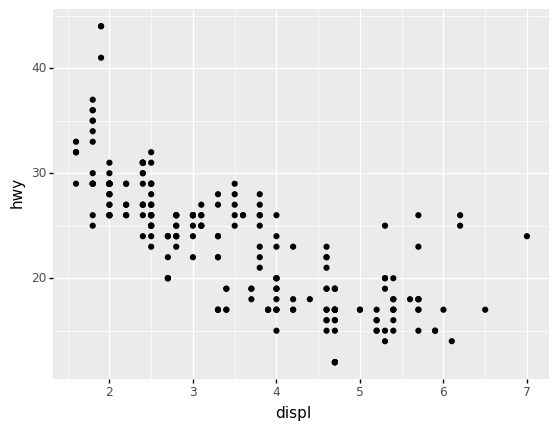

<ggplot: (8786900371914)>

In [48]:
fig + point1

In [49]:
a1

{'x': 'displ', 'y': 'hwy'}

In [50]:
sline1=geom_smooth(a1)

/Users/dlqhd/opt/anaconda3/lib/python3.8/site-packages/plotnine/stats/smoothers.py:310: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.


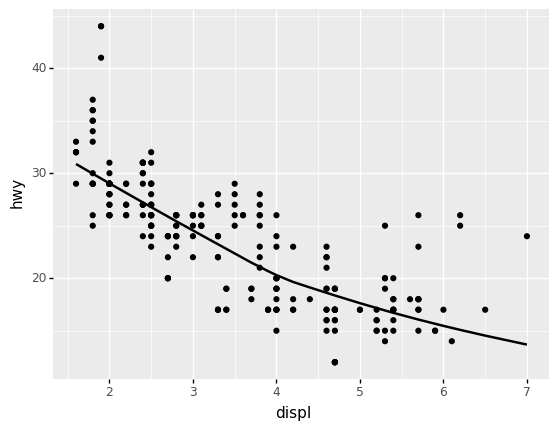

<ggplot: (8786883893224)>

In [54]:
fig+point1+sline1

/Users/dlqhd/opt/anaconda3/lib/python3.8/site-packages/plotnine/stats/smoothers.py:310: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.


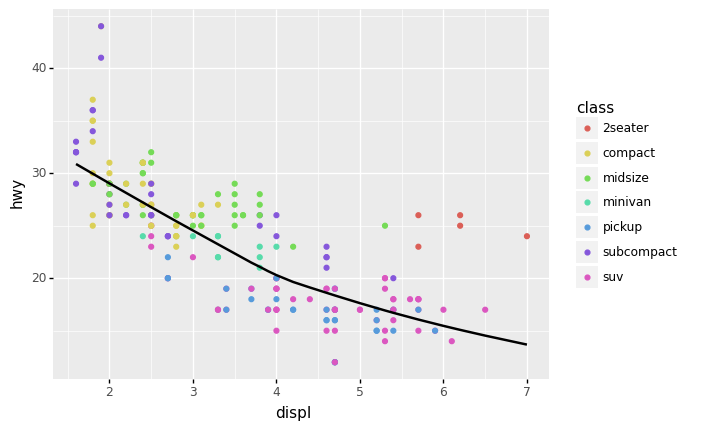

<ggplot: (8786883934341)>

In [56]:
fig+point2+sline1

`-` 명령어로 한번에 그리기

/Users/dlqhd/opt/anaconda3/lib/python3.8/site-packages/plotnine/stats/smoothers.py:310: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.


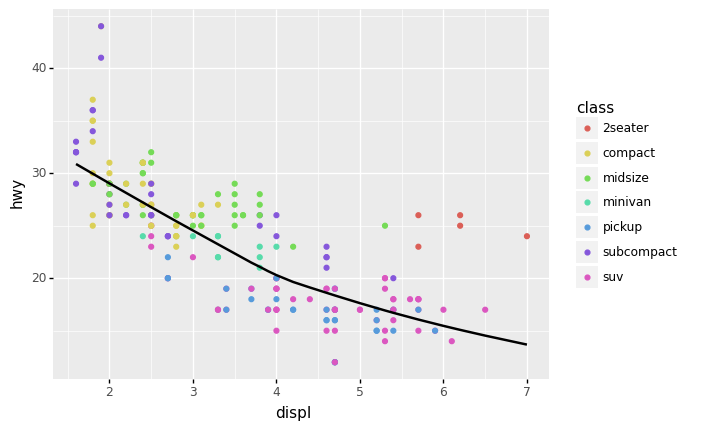

<ggplot: (8786884323178)>

In [62]:
ggplot(data=mpg)+geom_point(mapping=aes(x='displ',y='hwy',color='class'))+geom_smooth(mapping=aes(x='displ',y='hwy'))

`-` 공통적인 맵핑규칙은 ggplot()쪽으로 빼기도 한다. (figure를 선언하는 곳에서 공통으로 선언함)

/Users/dlqhd/opt/anaconda3/lib/python3.8/site-packages/plotnine/stats/smoothers.py:310: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.


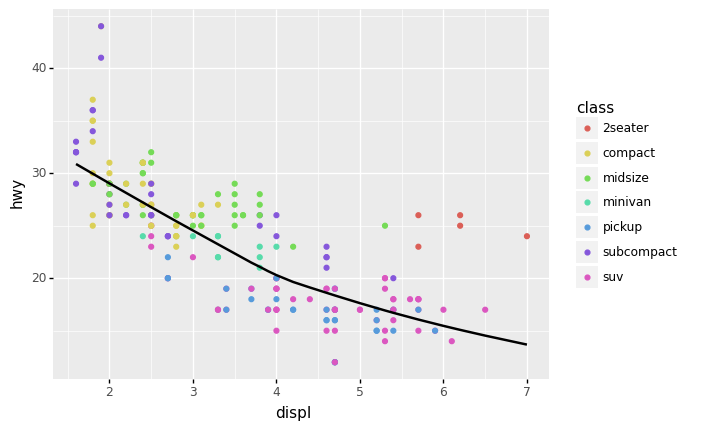

<ggplot: (8786884157645)>

In [64]:
ggplot(data=mpg,mapping=aes(x='displ',y='hwy'))+geom_point(mapping=aes(color='class'))+geom_smooth()

`-`R에서는 confidence interval도 geom_smooth()를 이용하여 확인할 수 있다.

### 산점도응용2 (4차원)

In [66]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


`-` drv (전륜, 후륜, 4륜 구동)에 따라 데이터를 시각화 하고싶다.

/Users/dlqhd/opt/anaconda3/lib/python3.8/site-packages/plotnine/scales/scale_size.py:48: PlotnineWarning: Using size for a discrete variable is not advised.


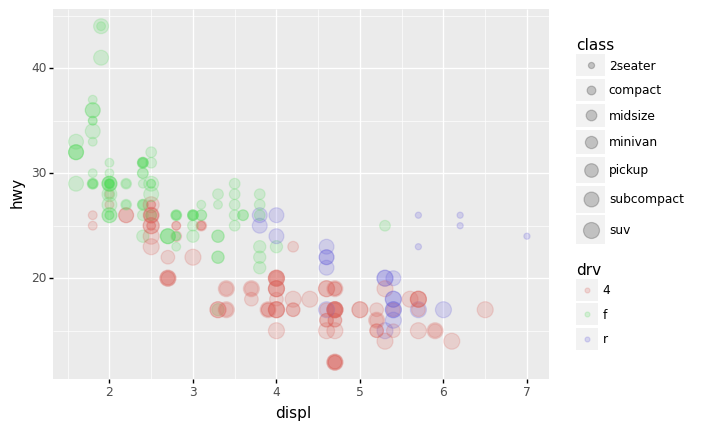

<ggplot: (8786883786924)>

In [75]:
ggplot(data=mpg, mapping=aes(x='displ',y='hwy'))+geom_point(mapping=aes(size='class',color='drv'),alpha=0.2)

- 모든 $x$축에 대하여 붉은색 점들이 대부분 초록선과 보라색 점들에 비하여 아래쪽에 위치하여 있음 $\to$ 4륜 구동방식이 연비가 좋지 않음

`-`객체지향적

In [121]:
a1,a2

({'x': 'displ', 'y': 'hwy'}, {'x': 'displ', 'y': 'hwy', 'color': 'class'})

In [122]:
a3=a2.copy()

In [123]:
id(a1),id(a2),id(a3)

(140590399987280, 140590136475456, 140590136414912)

In [124]:
a3['color']='drv'
a3['size']='class'

In [133]:
a1,a2,a3

({'x': 'displ', 'y': 'hwy'},
 {'x': 'displ', 'y': 'hwy', 'color': 'class'},
 {'x': 'displ', 'y': 'hwy', 'color': 'drv', 'size': 'class'})

- 아래와 같이 선언해도 괜찮음
```python
a3=aes(x='displ',y='hwy',color='drv',size='class')
```

In [127]:
a3=a2

In [128]:
a3['color']='drv'
a3['size']='class'

In [129]:
a1,a2,a3 #a2,a3가 같이 바뀌게 됌(같은 메모리 주소 사용)

({'x': 'displ', 'y': 'hwy'},
 {'x': 'displ', 'y': 'hwy', 'color': 'drv', 'size': 'class'},
 {'x': 'displ', 'y': 'hwy', 'color': 'drv', 'size': 'class'})

In [130]:
id(a1),id(a2),id(a3)

(140590399987280, 140590136475456, 140590136475456)

In [131]:
a2 = aes(x='displ',y='hwy',color='class')

In [132]:
a3=a2.copy()
a3['color']='drv'
a3['size']='class'

In [134]:
point3=geom_point(a3)

/Users/dlqhd/opt/anaconda3/lib/python3.8/site-packages/plotnine/scales/scale_size.py:48: PlotnineWarning: Using size for a discrete variable is not advised.


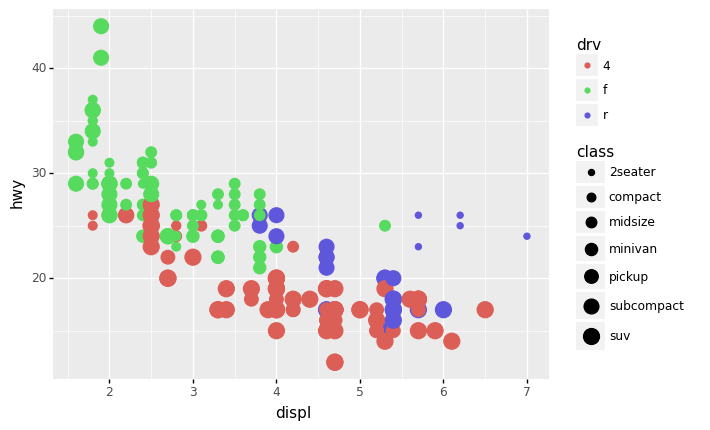

<ggplot: (8786868732769)>

In [135]:
fig+point3

+ 투명도 조절

/Users/dlqhd/opt/anaconda3/lib/python3.8/site-packages/plotnine/scales/scale_size.py:48: PlotnineWarning: Using size for a discrete variable is not advised.


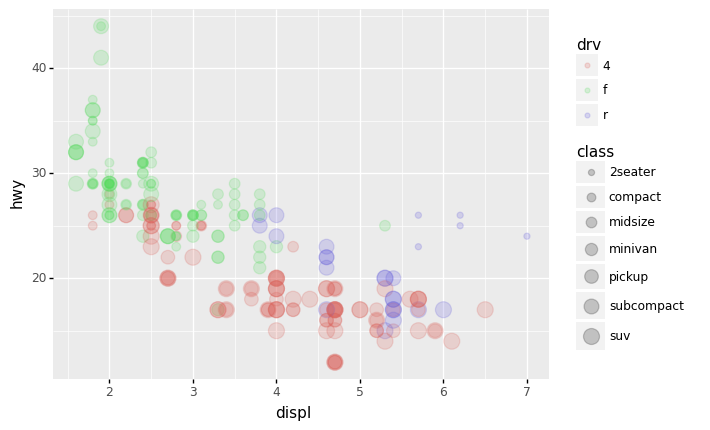

<ggplot: (8786883538851)>

In [137]:
point3=geom_point(a3,alpha=0.2)
fig+point3

`-` 여기에 선을 추가하여 보자.

/Users/dlqhd/opt/anaconda3/lib/python3.8/site-packages/plotnine/scales/scale_size.py:48: PlotnineWarning: Using size for a discrete variable is not advised.
/Users/dlqhd/opt/anaconda3/lib/python3.8/site-packages/plotnine/stats/smoothers.py:310: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.


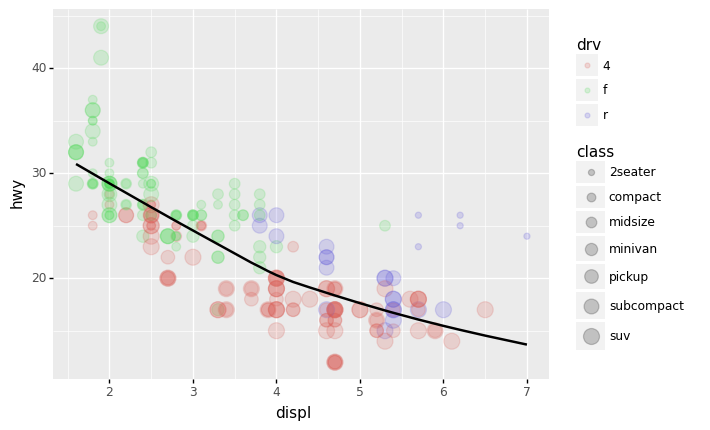

<ggplot: (8786868796763)>

In [139]:
fig+point3+sline1

`-` 각 그룹별로 선을 따로 그릴 수도 있을까?

In [140]:
a1,a2,a3

({'x': 'displ', 'y': 'hwy'},
 {'x': 'displ', 'y': 'hwy', 'color': 'class'},
 {'x': 'displ', 'y': 'hwy', 'color': 'drv', 'size': 'class'})

In [142]:
a4=a2.copy()

In [144]:
a4['color']='drv'

In [146]:
sline2=geom_smooth(a4)

/Users/dlqhd/opt/anaconda3/lib/python3.8/site-packages/plotnine/scales/scale_size.py:48: PlotnineWarning: Using size for a discrete variable is not advised.
/Users/dlqhd/opt/anaconda3/lib/python3.8/site-packages/plotnine/stats/smoothers.py:310: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.


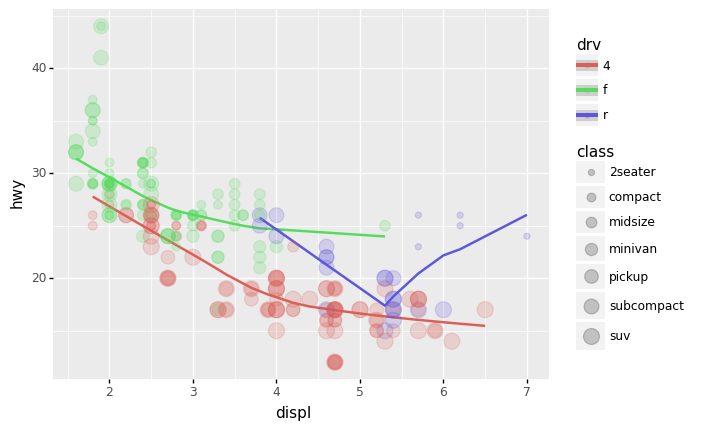

<ggplot: (8786917567013)>

In [148]:
fig+sline2+point3

`-` 선의 색깔을 동일하게 하고 선의 타입을 변경하여 그룹을 표시 할 수도 있지 않을까?

In [149]:
a1,a2,a3,a4

({'x': 'displ', 'y': 'hwy'},
 {'x': 'displ', 'y': 'hwy', 'color': 'class'},
 {'x': 'displ', 'y': 'hwy', 'color': 'drv', 'size': 'class'},
 {'x': 'displ', 'y': 'hwy', 'color': 'drv'})

In [150]:
a5=a1.copy()

In [151]:
a5['linetype']='drv'

In [152]:
sline3=geom_smooth(a5)

/Users/dlqhd/opt/anaconda3/lib/python3.8/site-packages/plotnine/scales/scale_size.py:48: PlotnineWarning: Using size for a discrete variable is not advised.
/Users/dlqhd/opt/anaconda3/lib/python3.8/site-packages/plotnine/stats/smoothers.py:310: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.


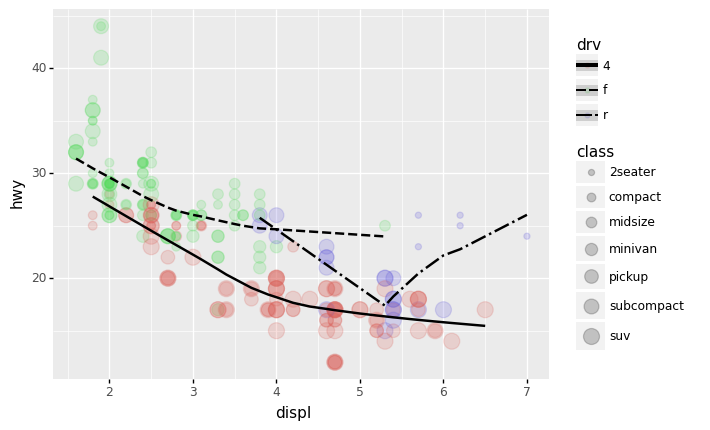

<ggplot: (8786916736805)>

In [153]:
fig+point3+sline3

In [155]:
sline3=geom_smooth(a5,size=0.5,color='gray')

/Users/dlqhd/opt/anaconda3/lib/python3.8/site-packages/plotnine/scales/scale_size.py:48: PlotnineWarning: Using size for a discrete variable is not advised.
/Users/dlqhd/opt/anaconda3/lib/python3.8/site-packages/plotnine/stats/smoothers.py:310: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.


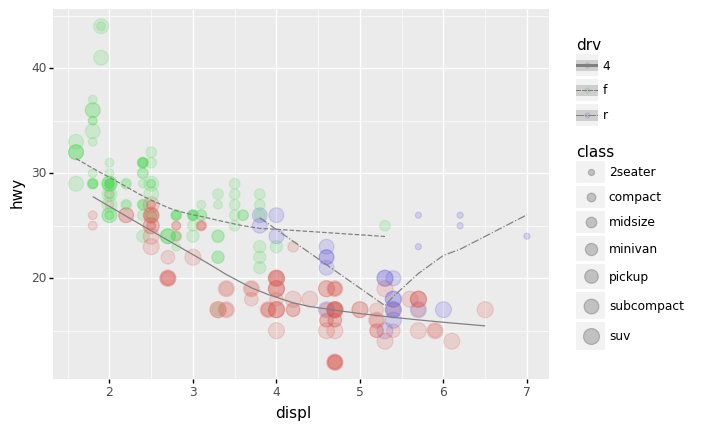

<ggplot: (8786916735347)>

In [156]:
fig+point3+sline3

/Users/dlqhd/opt/anaconda3/lib/python3.8/site-packages/plotnine/scales/scale_size.py:48: PlotnineWarning: Using size for a discrete variable is not advised.
/Users/dlqhd/opt/anaconda3/lib/python3.8/site-packages/plotnine/stats/smoothers.py:310: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.
/Users/dlqhd/opt/anaconda3/lib/python3.8/site-packages/plotnine/stats/smoothers.py:310: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.


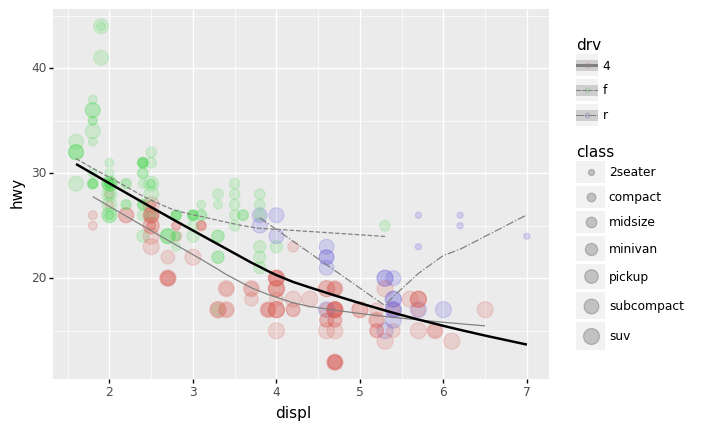

<ggplot: (8786883484733)>

In [157]:
fig+point3+sline3+sline1

/Users/dlqhd/opt/anaconda3/lib/python3.8/site-packages/plotnine/scales/scale_size.py:48: PlotnineWarning: Using size for a discrete variable is not advised.
/Users/dlqhd/opt/anaconda3/lib/python3.8/site-packages/plotnine/stats/smoothers.py:310: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.
/Users/dlqhd/opt/anaconda3/lib/python3.8/site-packages/plotnine/stats/smoothers.py:310: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.


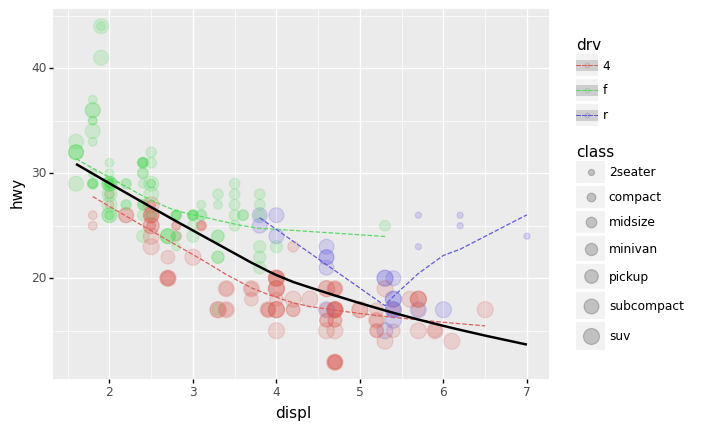

<ggplot: (8786883914271)>

In [158]:
sline2=geom_smooth(a4,size=0.5,linetype='dashed')
fig+point3+sline2+sline1

`-` 고차원의 변수를 표현할 수 있는 무기는 다양하다.
- 산점도(포인트지옴): 점의 크기, 점의 형태, 점의 색깔, 점의 투명도 등
- 라인플랏(스무스지옴, 라인지옴): 선의 형태, 선의 색깔, 선의 굵기

### 결론

`-` 잘 훈련한다면 여러가지 형태의 고차원 그래프를 그릴 수 있다. (마치 미나드처럼)

`-` 해들리위컴은 이러한 방법을 체계적으로 정리했다고 보여진다.

`-` 해들리위컴 : 그래프는 데이터+지옴=맵핑(변수와 에스테틱간의 맵핑)+ ...[스탯(통계) + 포지션 + 축 + 패싯그리드] 의 조합으로 그릴 수 있다.
> 지옴 + 맵핑만으로도 충분히 많은 그래프가 가능하다.